# TFM - UNIT - ENERGY-PRICE BID CURVE COMPARISON

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from TFM_PredCurve_Tools import data_date_hour_info, convert_to_df_curve, days_25h_23h
from TFM_PredCurve_Tools import data_report, data_report_total, missing_dates, bid_hour_summary
from TFM_PredCurve_Tools import plot_bid_curve, plot_marginal_price, plot_bid_margprice, plot_bid_margprice_day
from TFM_PredCurve_Tools import plot_bid_curve_day, plot_marginal_price_day, myplot, plot_24bids
from TFM_PredCurve_Tools import plot_bid_timeperiod, plot_bid_timeperiod_line
from TFM_PredCurve_Tools import plot_energy_timeperiod, plot_energy_timeperiod_line
from TFM_PredCurve_Tools import df_structure_24h, area_pred_curve_summary, df_pred_summary

In [10]:
#pd.reset_option('precision')
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None

In [11]:
unit_path = '/home/dsc/Documents/TFM/Data/OMIE/'

In [12]:
unit_list = ['PALOS1',
             'PALOS2',
             'PALOS3',
             'SAGUNTO1',
             'SAGUNTO2',
             'ARCOS1',
             'ARCOS2',
             'ARCOS3',
             'COLON4',
             'ESCATRON3',
             'ALGECIRAS3',
             'CASTELNOU']

In [13]:
df_unit_list = []

for unit in unit_list:

    df_unit = pd.read_csv(unit_path + 'OMIE_' + unit + '_112019_102020.csv',index_col=0)
    df_unit = convert_to_df_curve(df_unit)
    df_unit['Unit'] = unit
    df_unit_list.append(df_unit)
   

/home/dsc/Repos/TFM/TFM_PredCurve_Tools.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Date']= pd.to_datetime(df_curve[['Year', 'Month', 'Day']])
/home/dsc/Repos/TFM/TFM_PredCurve_Tools.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Weekday'] = df_curve['Date'].apply(lambda x: x.weekday())
/home/dsc/Repos/TFM/TFM_PredCurve_Tools.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

/home/dsc/Repos/TFM/TFM_PredCurve_Tools.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Date']= pd.to_datetime(df_curve[['Year', 'Month', 'Day']])
/home/dsc/Repos/TFM/TFM_PredCurve_Tools.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Weekday'] = df_curve['Date'].apply(lambda x: x.weekday())
/home/dsc/Repos/TFM/TFM_PredCurve_Tools.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [15]:
df_units = pd.concat(df_unit_list)

In [16]:
df_units.shape

(508579, 12)

In [18]:
df_marg_price = pd.read_csv('/home/dsc/Documents/TFM/Data/OMIE/MARGINAL_PRICES_SPAIN.csv',index_col=0)

In [19]:
#Only information of the time period of the unit

df_price = df_marg_price[df_marg_price[(df_marg_price['Date']== str(df_units['Date'].min())[0:10]) &
              (df_marg_price['Period']== df_marg_price['Period'].min())].index[0]:
              df_marg_price[(df_marg_price['Date']== str(df_units['Date'].max())[0:10]) &
              (df_marg_price['Period']== 24)].index[0]+1]

df_price.reset_index(drop=True,inplace=True)

In [20]:
df_units = df_units.merge(df_price[['Year', 'Month', 'Day', 'Period','Marg_Price']], how = 'left')

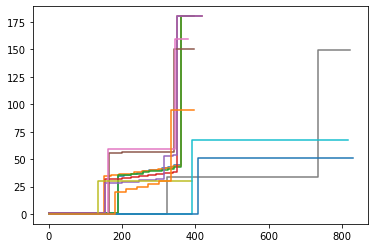

In [21]:
date = '2020-8-31'
hour = 18

for unit in unit_list:
    plot_bid_curve(df_units[df_units['Unit']==unit], date, hour)

In [22]:
date = '2020-8-31'
hour = 18

df_plot_all = df_units[(df_units['Date']==date) &
         (df_units['Period']==hour)]

df_plot_all.sort_values('Price', inplace=True)
df_plot_all.reset_index(drop=True, inplace=True)
df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()

<ipython-input-22-cf968ed31a1e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all.sort_values('Price', inplace=True)
<ipython-input-22-cf968ed31a1e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()


In [24]:
sns.set_theme(style='darkgrid')

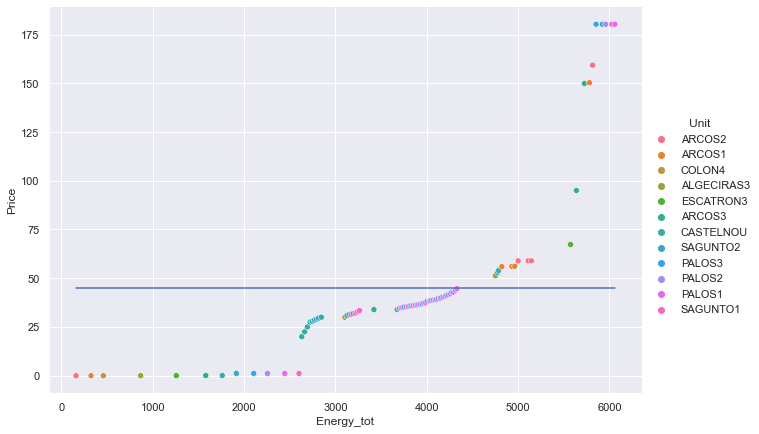

In [25]:
sns.relplot(data=df_plot_all, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=1.5)

plt.plot(df_plot_all['Energy_tot'], df_plot_all['Marg_Price'])

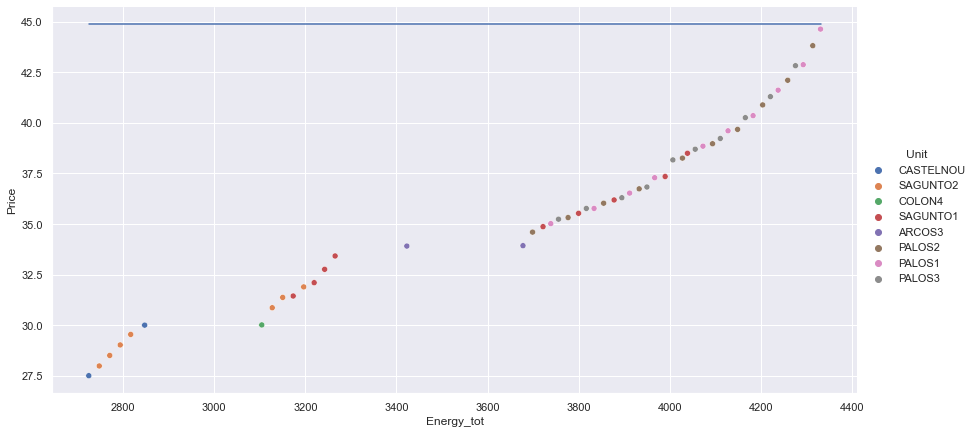

In [30]:
lim_min = 2700
lim_max = 4500

df_plot_all_sub = df_plot_all[(df_plot_all['Energy_tot'] > lim_min) &
                              (df_plot_all['Energy_tot'] < lim_max)]

sns.relplot(data=df_plot_all_sub, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=2)

plt.plot(df_plot_all_sub['Energy_tot'], df_plot_all_sub['Marg_Price'])

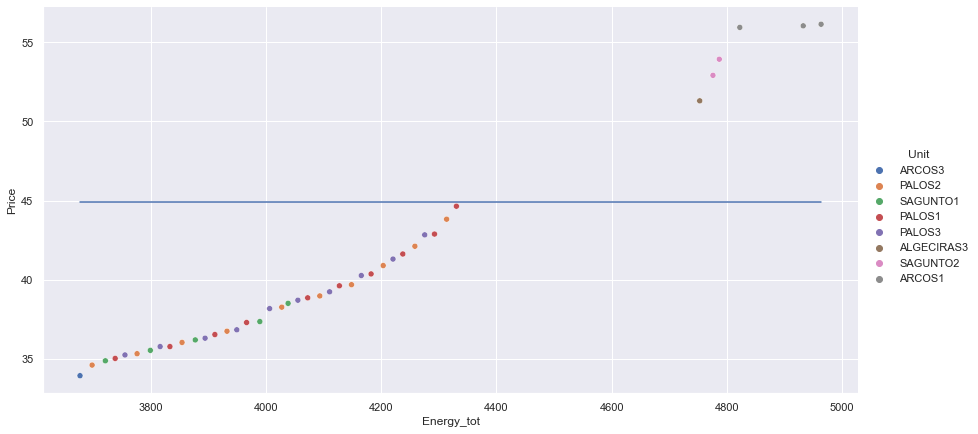

In [32]:
lim_min = 3600
lim_max = 5000

df_plot_all_sub = df_plot_all[(df_plot_all['Energy_tot'] > lim_min) &
                              (df_plot_all['Energy_tot'] < lim_max)]

sns.relplot(data=df_plot_all_sub, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=2);

plt.plot(df_plot_all_sub['Energy_tot'], df_plot_all_sub['Marg_Price']);

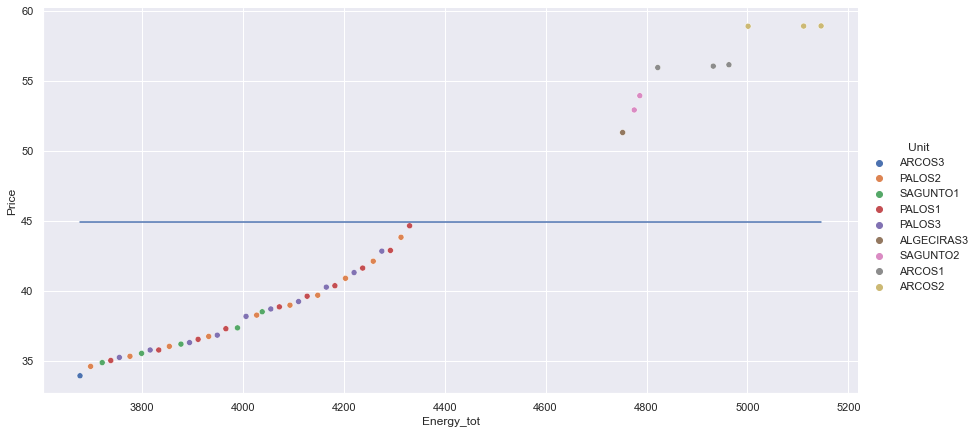

In [37]:
lim_min = 3600
lim_max = 5500

df_plot_all_sub = df_plot_all[(df_plot_all['Energy_tot'] > lim_min) &
                              (df_plot_all['Energy_tot'] < lim_max)]

sns.relplot(data=df_plot_all_sub, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=2);

plt.plot(df_plot_all_sub['Energy_tot'], df_plot_all_sub['Marg_Price']);

In [33]:
df_plot_all[df_plot_all['Unit'] == 'ESCATRON3']

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit,Marg_Price
4,818.00,2020,8,31,18,1,0.01,390.00,2020-08-31,Monday,"1,259.40",ESCATRON3,44.88
75,818.00,2020,8,31,18,2,67.30,428.00,2020-08-31,Monday,"5,573.90",ESCATRON3,44.88


In [34]:
df_plot_all[df_plot_all['Unit'] == 'ALGECIRAS3']

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit,Marg_Price
3,830.10,2020,8,31,18,1,0.01,408.00,2020-08-31,Monday,869.40,ALGECIRAS3,44.88
66,830.10,2020,8,31,18,2,51.30,422.10,2020-08-31,Monday,"4,752.70",ALGECIRAS3,44.88


In [35]:
df_plot_all_sub.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit,Marg_Price
30,822.90,2020,8,31,18,3,33.93,254.90,2020-08-31,Monday,"3,677.60",ARCOS3,44.88
31,395.60,2020,8,31,18,2,34.60,21.00,2020-08-31,Monday,"3,698.60",PALOS2,44.88
32,417.30,2020,8,31,18,6,34.87,23.00,2020-08-31,Monday,"3,721.60",SAGUNTO1,44.88
33,394.10,2020,8,31,18,2,35.02,17.00,2020-08-31,Monday,"3,738.60",PALOS1,44.88
34,397.80,2020,8,31,18,2,35.24,17.00,2020-08-31,Monday,"3,755.60",PALOS3,44.88


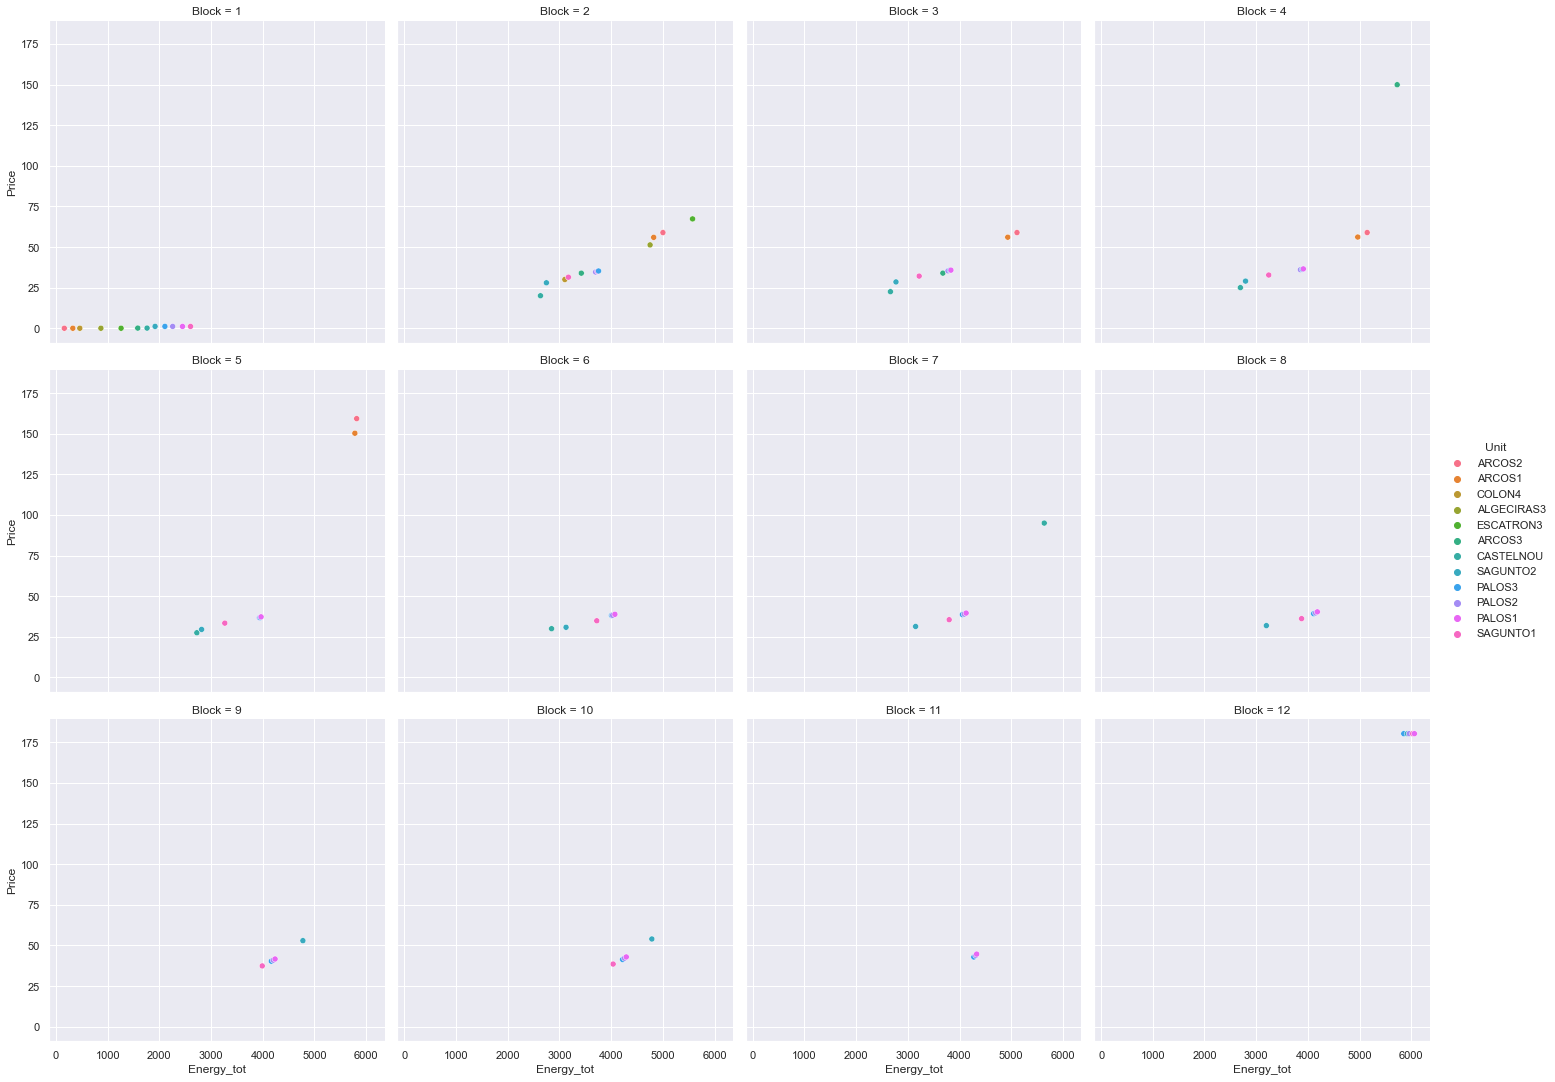

In [36]:
sns.relplot(data=df_plot_all, x='Energy_tot', y='Price', hue='Unit', col='Block', col_wrap=4);

<ipython-input-84-abea2bb0f44f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all.sort_values('Price', inplace=True)
<ipython-input-84-abea2bb0f44f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()


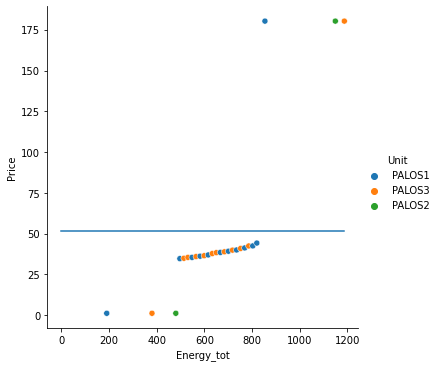

In [84]:
date = '2020-9-15'
hour = 24

df_plot_all = df_units[(df_units['Date']==date) &
         (df_units['Period']==hour)]

df_plot_all.sort_values('Price', inplace=True)
df_plot_all.reset_index(drop=True, inplace=True)
df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()

sns.relplot(data=df_plot_all, x='Energy_tot', y='Price', hue='Unit')

plt.plot(pd.Series(0).append(df_plot_all['Energy_tot']), 
                    pd.Series(df_plot_all['Marg_Price'].iloc[0]).append(df_plot_all['Marg_Price']), 
                    drawstyle='steps', 
                    label='steps (=steps-pre)')